<a href="https://colab.research.google.com/github/DavidCastro88/ProjectsData/blob/main/DataVisualizationAmazonProducts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Data visualization***

**Dataset:** [Amazon Products](https://www.kaggle.com/datasets/lokeshparab/amazon-products-dataset?select=Amazon-Products.csv)

What is the average price for Air Conditioners?

Which categories contain the highest priced products?

Is there a correlation between price and rating of products?

What is the price range depending on the type of subcategory?


In [112]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from google.colab import files
import seaborn as sns

In [1]:
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"dcastro88","key":"1151a771cdd414d4a08b20fc69e79fa3"}'}

In [2]:

# Crear un directorio para el archivo .kaggle
os.makedirs('/root/.kaggle', exist_ok=True)

# Copiar kaggle.json al directorio creado
!cp kaggle.json /root/.kaggle/

# Establecer permisos para kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

# Instalar el paquete de Kaggle
!pip install kaggle

In [3]:
# Usar la API de Kaggle para descargar el dataset
!kaggle datasets download -d lokeshparab/amazon-products-dataset

# Crear un directorio para los datos descargados
os.makedirs('kaggle_data', exist_ok=True)

# Descomprimir el archivo descargado
import zipfile
with zipfile.ZipFile('amazon-products-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('kaggle_data')

Dataset URL: https://www.kaggle.com/datasets/lokeshparab/amazon-products-dataset
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
 83% 66.0M/79.7M [00:00<00:00, 83.1MB/s]
100% 79.7M/79.7M [00:00<00:00, 85.4MB/s]


In [4]:
# Listar archivos en el directorio descargado
for dirname, _, filenames in os.walk('kaggle_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

kaggle_data/Fashion and Silver Jewellery.csv
kaggle_data/Fine Art.csv
kaggle_data/Car Parts.csv
kaggle_data/Household Supplies.csv
kaggle_data/Home Improvement.csv
kaggle_data/Furniture.csv
kaggle_data/Kids Clothing.csv
kaggle_data/Speakers.csv
kaggle_data/Jeans.csv
kaggle_data/All Appliances.csv
kaggle_data/Kids Shoes.csv
kaggle_data/Casual Shoes.csv
kaggle_data/Beauty and Grooming.csv
kaggle_data/Home Dcor.csv
kaggle_data/Sports Shoes.csv
kaggle_data/Car and Bike Care.csv
kaggle_data/International Music.csv
kaggle_data/Kids Fashion.csv
kaggle_data/Yoga.csv
kaggle_data/Snack Foods.csv
kaggle_data/Handbags and Clutches.csv
kaggle_data/All Movies and TV Shows.csv
kaggle_data/Nursing and Feeding.csv
kaggle_data/Car Accessories.csv
kaggle_data/Security Cameras.csv
kaggle_data/Formal Shoes.csv
kaggle_data/Cameras.csv
kaggle_data/Shirts.csv
kaggle_data/Strength Training.csv
kaggle_data/All Exercise and Fitness.csv
kaggle_data/Televisions.csv
kaggle_data/Janitorial and Sanitation Supplies.cs

In [51]:
data = pd.read_csv('kaggle_data/Amazon-Products.csv')
data.head()

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990"
4,4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"


In [52]:
data.columns

Index(['Unnamed: 0', 'name', 'main_category', 'sub_category', 'image', 'link',
       'ratings', 'no_of_ratings', 'discount_price', 'actual_price'],
      dtype='object')

In [53]:
data.shape

(551585, 10)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      551585 non-null  int64 
 1   name            551585 non-null  object
 2   main_category   551585 non-null  object
 3   sub_category    551585 non-null  object
 4   image           551585 non-null  object
 5   link            551585 non-null  object
 6   ratings         375791 non-null  object
 7   no_of_ratings   375791 non-null  object
 8   discount_price  490422 non-null  object
 9   actual_price    533772 non-null  object
dtypes: int64(1), object(9)
memory usage: 42.1+ MB


In [55]:
data.drop(columns=['Unnamed: 0','image','link'],axis=1,inplace=True)

In [56]:
data.head()

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,4.2,"2,255","₹32,999","₹58,990"
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.2,"2,948","₹46,490","₹75,990"
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,4.2,"1,206","₹34,490","₹61,990"
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.0,69,"₹37,990","₹68,990"
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,4.1,630,"₹34,490","₹67,790"


In [57]:
data = data.dropna()

In [58]:
data.shape

(340680, 7)

In [59]:
data['ratings'].unique()

array(['4.2', '4.0', '4.1', '4.3', '3.9', '3.8', '3.5', '4.6', '3.3',
       '3.4', '3.7', '2.9', '5.0', '4.4', '3.6', '2.7', '4.5', '3.0',
       '3.1', '4.8', '4.7', '3.2', '2.5', '1.0', '2.6', '2.8', '1.7',
       'Get', '1.8', '2.4', '4.9', '2.2', '1.6', '1.9', '2.3', '2.0',
       '1.4', '2.1', 'FREE', '1.2', '1.3', '1.5', '₹65', '1.1', '₹70',
       '₹100', '₹99', '₹2.99'], dtype=object)

In [60]:
unwanted_values = ['Get', 'FREE', '₹65', '₹70', '₹100', '₹99', '₹2.99']
data['ratings'].isin(unwanted_values).sum()

5717

In [61]:
indexs = data[data['ratings'].isin(unwanted_values)].index
data = data.drop(indexs)
data['ratings'] = data['ratings'].astype(float)

In [62]:
data.shape

(334963, 7)

In [63]:
data['no_of_ratings'].unique()

array(['2,255', '2,948', '1,206', ..., '55,051', '3,329', '7,141'],
      dtype=object)

In [64]:
data['no_of_ratings'] = data['no_of_ratings'].str.replace(',', '')
data['no_of_ratings'] = data['no_of_ratings'].astype(float)

In [67]:
data.describe()

,ratings,no_of_ratings
count,334963.000000,334963.000000
mean,3.814368,853.864540
std,0.754169,8890.977903
min,1.000000,1.000000
25%,3.500000,4.000000
50%,3.900000,20.000000
75%,4.200000,131.000000
max,5.000000,589547.000000


In [68]:
data['discount_price'] = data['discount_price'].str.replace(',', '')
data['actual_price'] = data['actual_price'].str.replace(',', '')

In [72]:
data['discount_price'] = data['discount_price'].str.replace('₹', '')
data['actual_price'] = data['actual_price'].str.replace('₹', '')

In [74]:
data['discount_price'] = data['discount_price'].astype(float)
data['actual_price'] = data['actual_price'].astype(float)

In [75]:
data.describe()

,ratings,no_of_ratings,discount_price,actual_price
count,334963.000000,334963.000000,3.349630e+05,3.349630e+05
mean,3.814368,853.864540,1.759009e+03,3.298855e+04
std,0.754169,8890.977903,6.394477e+03,1.710586e+07
min,1.000000,1.000000,8.000000e+00,1.000000e+01
25%,3.500000,4.000000,3.590000e+02,9.000000e+02
50%,3.900000,20.000000,5.990000e+02,1.499000e+03
75%,4.200000,131.000000,1.199000e+03,2.799000e+03
max,5.000000,589547.000000,1.249990e+06,9.900000e+09


### ***What is the average price for Air Conditioners?***

In [78]:
air_conditioners = data[data['sub_category']=='Air Conditioners']

In [79]:
air_conditioners['actual_price'].mean()

58299.54517133957

In [80]:
air_conditioners['discount_price'].mean()

40818.43302180686

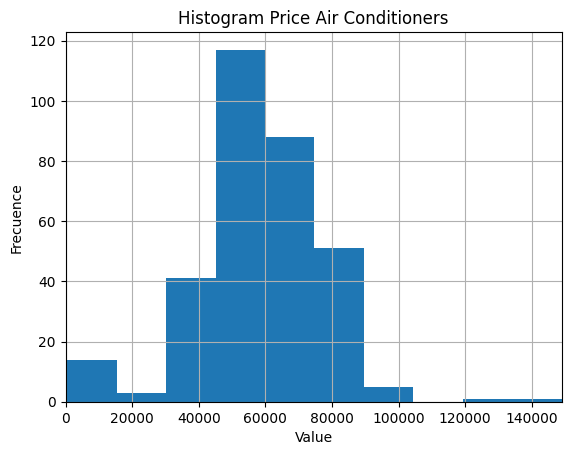

In [89]:
plt.hist(air_conditioners['actual_price'], bins=10)
plt.title('Histogram Price Air Conditioners')
plt.xlabel('Value')
plt.ylabel('Frecuence')
plt.grid(True)

# Especificar el rango de los ejes x e y
plt.xlim(0, air_conditioners['actual_price'].max())  # Ajusta el límite máximo del eje x
plt.ylim(0, None)  # Ajusta el límite máximo del eje y

plt.show()

### ***Which categories contain the highest priced products?***

In [93]:
data['main_category'].unique()

array(['appliances', 'car & motorbike', 'tv, audio & cameras',
       'sports & fitness', 'grocery & gourmet foods', 'home & kitchen',
       'pet supplies', 'stores', 'toys & baby products', "kids' fashion",
       'bags & luggage', 'accessories', "women's shoes",
       'beauty & health', "men's shoes", "women's clothing",
       'industrial supplies', "men's clothing", 'music',
       'home, kitchen, pets'], dtype=object)

In [105]:
data.drop(194625,inplace=True)

In [109]:
data.drop(402750,inplace=True)

In [129]:
data.drop(498818,inplace=True)

In [130]:
mean_by_category = data.groupby('main_category')['actual_price'].mean().reset_index()
mean_by_category = mean_by_category.sort_values(by='actual_price',ascending=False)
mean_by_category

,main_category,actual_price
1,appliances,7566.07
12,music,6217.96
17,"tv, audio & cameras",6033.71
7,"home, kitchen, pets",4458.25
11,men's shoes,3357.86
2,bags & luggage,3135.98
0,accessories,3076.31
8,industrial supplies,3030.58
14,sports & fitness,2884.99
15,stores,2527.10


In [131]:
pd.options.display.float_format = '{:.2f}'.format
max_by_category = data.groupby('main_category')['actual_price'].max().reset_index()
max_by_category = max_by_category.sort_values(by='actual_price',ascending=False)
max_by_category

,main_category,actual_price
0,accessories,700300.00
17,"tv, audio & cameras",699900.00
1,appliances,316990.00
14,sports & fitness,280000.00
2,bags & luggage,190000.00
15,stores,123719.00
9,kids' fashion,123719.00
12,music,122440.00
4,car & motorbike,104757.00
6,home & kitchen,100000.00


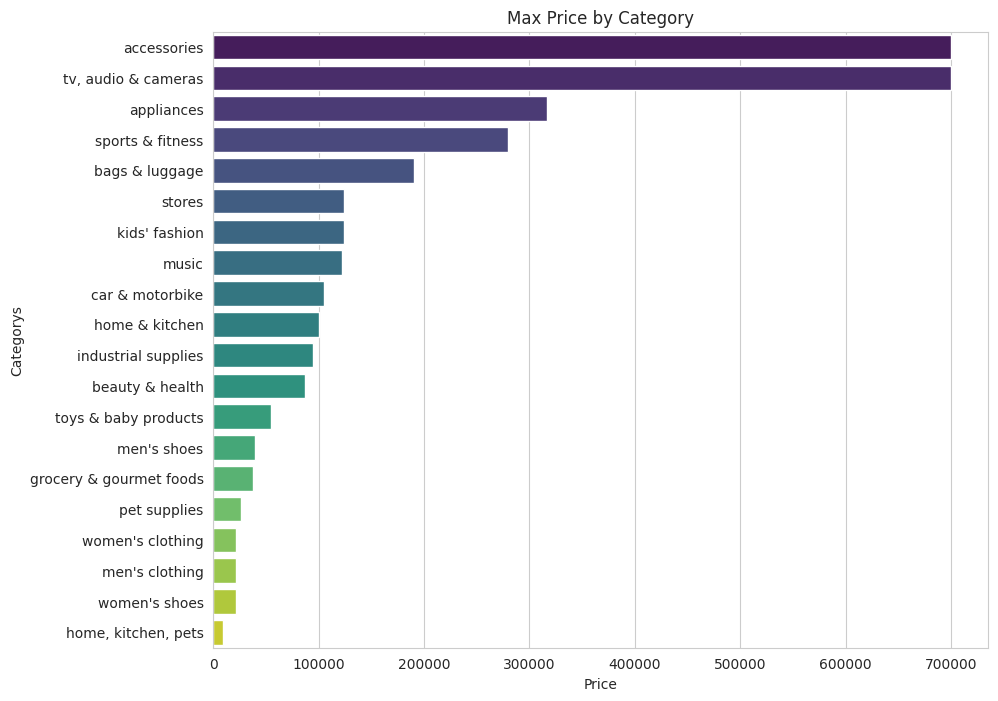

In [132]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
sns.barplot(x=max_by_category['actual_price'], y=max_by_category['main_category'], hue=max_by_category['main_category'], legend=False, palette='viridis')
plt.xlabel('Price')
plt.ylabel('Categorys')
plt.title('Max Price by Category')
plt.show()

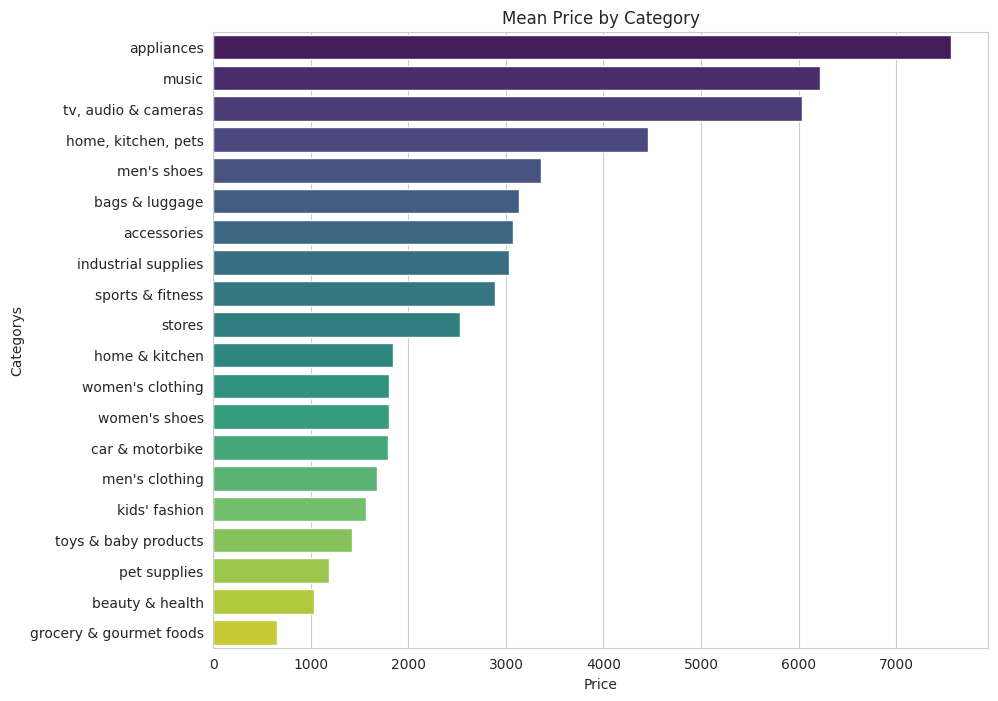

In [133]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
sns.barplot(x=mean_by_category['actual_price'], y=mean_by_category['main_category'], hue=mean_by_category['main_category'], legend=False, palette='viridis')
plt.xlabel('Price')
plt.ylabel('Categorys')
plt.title('Mean Price by Category')
plt.show()

### ***Is there a correlation between price and rating of products?***


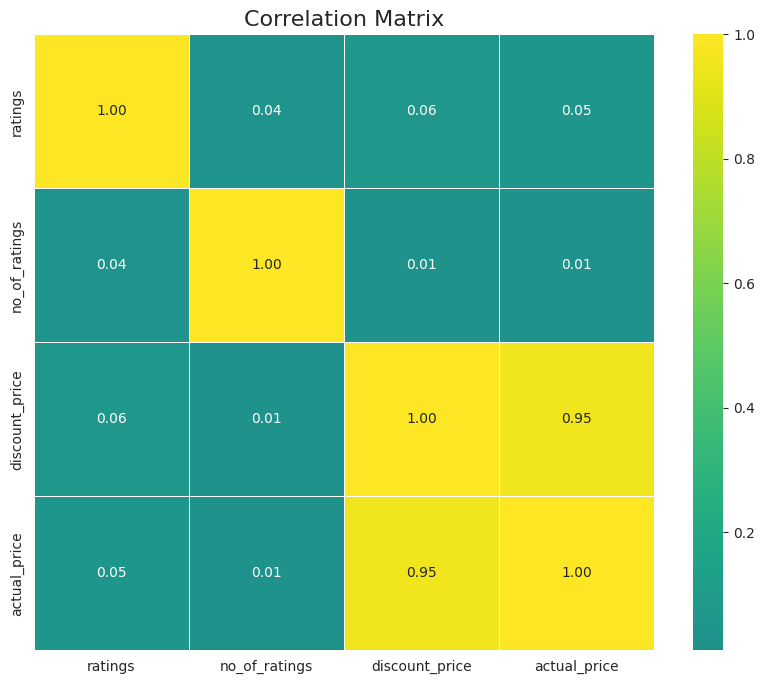

In [136]:
correlation_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', center=0, fmt=".2f", linewidths=0.5, cbar=True)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

There is no significant correlation linear between the rating and the price of the products

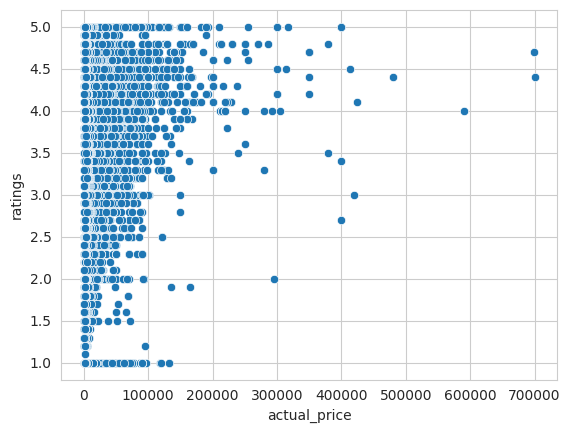

In [135]:
sns.scatterplot(x='actual_price', y='ratings', data=data)
plt.show()

### ***What is the price range depending on the type of subcategory?***

In [138]:
data['sub_category'].unique(),len(data['sub_category'].unique())

(array(['Air Conditioners', 'All Appliances',
        'All Car & Motorbike Products', 'All Electronics',
        'All Exercise & Fitness', 'All Grocery & Gourmet Foods',
        'All Home & Kitchen', 'All Pet Supplies',
        'All Sports, Fitness & Outdoors', 'Amazon Fashion',
        'Baby Bath, Skin & Grooming', 'Baby Fashion', 'Baby Products',
        'Backpacks', 'Badminton', 'Bags & Luggage', 'Ballerinas',
        'Beauty & Grooming', 'Bedroom Linen', 'Camera Accessories',
        'Cameras', 'Camping & Hiking', 'Car & Bike Care',
        'Car Accessories', 'Car Electronics', 'Car Parts',
        'Cardio Equipment', 'Casual Shoes', 'Clothing',
        'Coffee, Tea & Beverages', 'Cricket', 'Cycling', 'Diapers',
        'Diet & Nutrition', 'Dog supplies', 'Ethnic Wear',
        'Fashion & Silver Jewellery', 'Fashion Sales & Deals',
        'Fashion Sandals', 'Fitness Accessories', 'Football',
        'Formal Shoes', 'Furniture', 'Garden & Outdoors',
        'Gold & Diamond Jeweller

In [139]:
min_by_sub_category = data.groupby('sub_category')['actual_price'].min().reset_index()
max_by_sub_category = data.groupby('sub_category')['actual_price'].max().reset_index()

In [141]:
range_sub_category = pd.merge(min_by_sub_category, max_by_sub_category, on='sub_category', suffixes=('_min', '_max'))

In [142]:
range_sub_category

,sub_category,actual_price_min,actual_price_max
0,Air Conditioners,499.00,149000.00
1,All Appliances,60.00,158490.00
2,All Car & Motorbike Products,96.00,43399.00
3,All Electronics,30.00,161999.00
4,All Exercise & Fitness,99.00,62480.00
...,...,...,...
107,Washing Machines,199.00,127990.00
108,Watches,139.00,99617.00
109,Western Wear,169.00,14999.00
110,Women's Fashion,99.00,70522.10


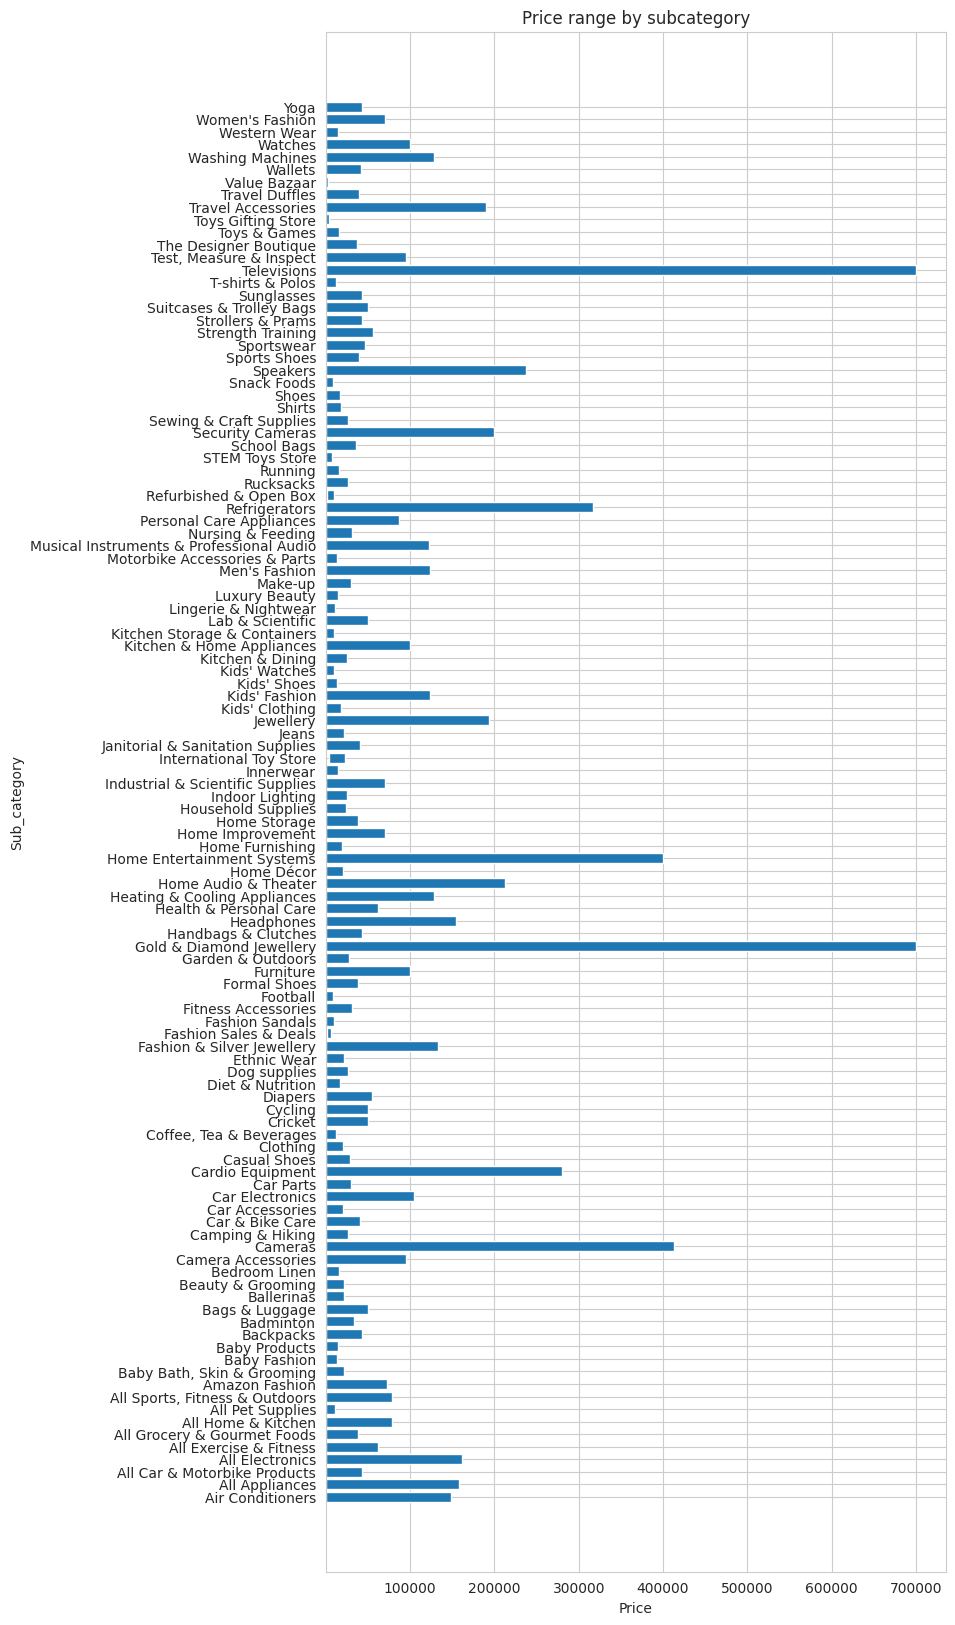

In [149]:
plt.figure(figsize=(8, 20))
plt.barh(range_sub_category['sub_category'], range_sub_category['actual_price_max'] - range_sub_category['actual_price_min'], left=range_sub_category['actual_price_min'])
plt.xlabel('Price')
plt.ylabel('Sub_category')
plt.title('Price range by subcategory')
plt.show()